## Importing Dpenedencies

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')

## 3. Stack plots

##### We have a list of minutes 1-9 which represents the first, second, ... minutes of the game. For the player, the score is how many points they have scored upto that point in the entire game.

For example player2 scored 1 point till the second minute of the game.

In [3]:
minutes = list(range(1,10))

player1 = [1, 2, 3, 3, 4, 4, 4, 4, 5]
player2 = [1, 1, 1, 1, 2, 2, 2, 3, 4]
player3 = [1, 1, 1, 2, 2, 2, 3, 3, 3]

##### Let's use a stack plot to look at the distribution over the entire range of 9 minutes.

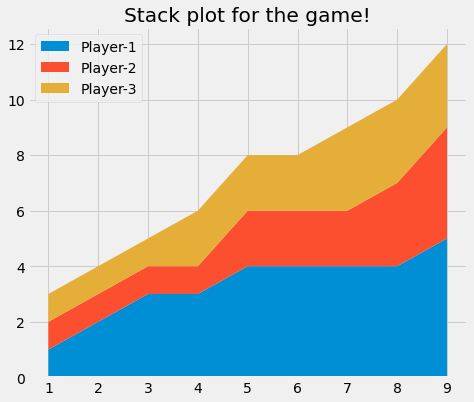

In [4]:
plt.figure(figsize=(7,6))
label = ['Player-1', 'Player-2', 'Player-3']
plt.stackplot(minutes, player1, player2, player3, labels=label)
plt.title("Stack plot for the game!")
plt.legend(loc='upper left')                                # setting the location of the legend to be in the upper left
plt.show()

#### Another common use case of stack plots is to visualize something that maintains a constant total. 

Let's say we have a project with 3 members and the total amount of work that can be done on that project by the 3 members combined should be exactly 8 hours. So, in this case we could use a stack plot to track who's working on the project the most.

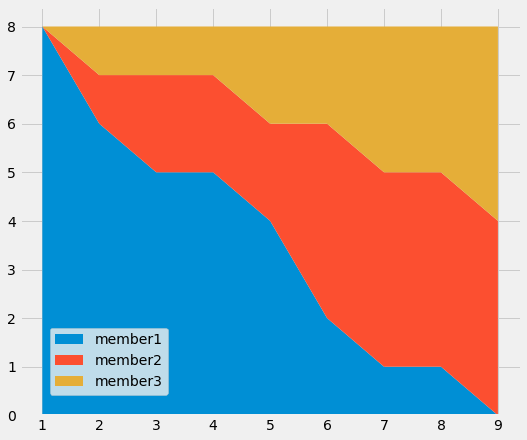

In [5]:
hours = list(range(1,10))

member1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
member2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
member3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['member1', 'member2', 'member3']

plt.figure(figsize=(8,7))
plt.stackplot(hours, member1, member2, member3, labels=labels)
plt.legend(loc=(0.06,0.05))                         # 6% away from the left and 5% away form the bottom
plt.show()

#### As we can observe that member 1 was working for the complete 8 hours initially after which slowly member 2 and 3 took over. Finally, member2 and member3 combined were woring 8 hours and member1 0.

<hr>

## 5. Line plots(contd.)

<a href = "https://chartio.com/learn/charts/line-chart-complete-guide/">All about Line Plots! </a>

#### What are line plots?
A line chart (aka line plot, line graph) uses points connected by line segments from left to right to demonstrate changes in value. The horizontal axis depicts a continuous progression, often that of time, while the vertical axis reports values for a metric of interest across that progression.

#### When to use line plots?
<ul>
    <li>You will use a line chart when you want to emphasize changes in values for one variable (plotted on the vertical axis) for continuous values of a second variable (plotted on the horizontal). </li>
    <li>On the horizontal axis, you need a variable that depicts continuous values that have a regular interval of measurement. Very commonly, this variable is a temporal one, generating an observation every minute, hour, day, week, or month. </li>
    <li>On the vertical axis, you will report the value of a second numeric variable for points that fall in each of the intervals defined by the horizontal-axis variable. </li>
</ul>

#### Best practices!

<ol>
    <li>An important aspect of creating a line chart is selecting the right interval or bin size. For temporal data, a too-broad of a measurement interval may mean that it takes too long to see where the data trend is leading, hiding away the useful signal. On the flip side of the coin, a too-short a measurement interval may only reveal noise rather than signal.</li>
    <li>A good rule of thumb is to limit yourself to five or fewer lines, lest the plot end up looking like an unreadable tangle.</li>
    <li>Despite the zero baseline for the vertical axis being a requirement for bar charts and histograms, you do not need to include a zero baseline for a line chart. Recall that the main goal of a line chart is to emphasize changes in value, rather than the magnitude of the values themselves.</li>
    <li>In a standard line chart, each point is connected to the next with a straight line segment, from first to last. However, there may be the aesthetic temptation to try and link all of the points smoothly, fitting a curve that goes through all of the points at once. You should absolutely resist this temptation!</li>
</ol>

In [6]:
data = pd.read_csv('developer_data.csv')  # contains ages and the median salaries of developers at that age
data.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


In [7]:
ages = data['Age']
data.shape

(38, 4)

#### Let's plot the salaries of all developers and python developers

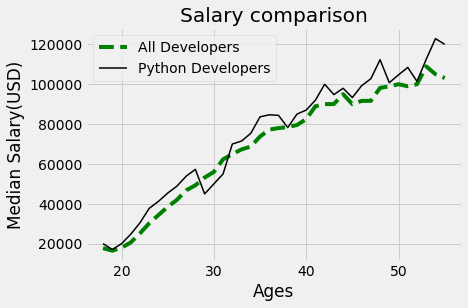

In [8]:
plt.plot(ages, data['All_Devs'], 'g--', label='All Developers')
plt.plot(ages, data['Python'], 'black', linewidth=1.5, label='Python Developers')
plt.title('Salary comparison')
plt.xlabel('Ages')
plt.ylabel('Median Salary(USD)')
plt.legend()
plt.show()

#### Let's now see how different fill works.

Say we want to fill the entire area below the python line. We can also fill between two different line plots by adding a second argument.

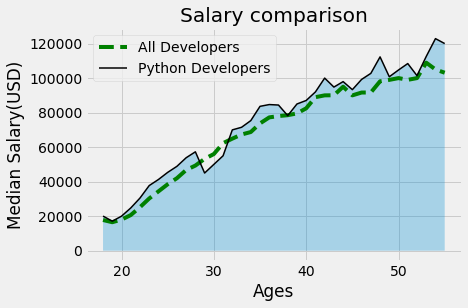

In [9]:
plt.plot(ages, data['All_Devs'], 'g--', label='All Developers')
plt.plot(ages, data['Python'], 'black', linewidth=1.5, label='Python Developers')
plt.title('Salary comparison')
plt.xlabel('Ages')
plt.ylabel('Median Salary(USD)')
plt.fill_between(ages, data['Python'], alpha=0.3)                  # alpha parameter adds tranparency
plt.legend()
plt.show()

#### Let's say now that instead of filling the whole range of salaries, we fill only between the the median salary of 57287 and python salaries.

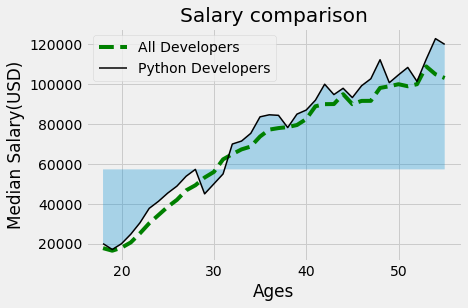

In [10]:
median_salary = 57287
plt.plot(ages, data['All_Devs'], 'g--', label='All Developers')
plt.plot(ages, data['Python'], 'black', linewidth=1.5, label='Python Developers')
plt.title('Salary comparison')
plt.xlabel('Ages')
plt.ylabel('Median Salary(USD)')
plt.fill_between(ages, data['Python'], median_salary, alpha=0.3)    # alpha parameter adds tranparency
plt.legend()
plt.show()

Additionally, let's change the color to green when we are above the median and blue when we are below.

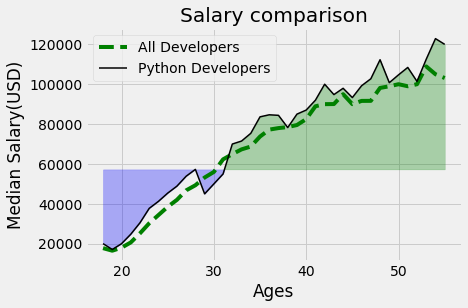

In [11]:
plt.plot(ages, data['All_Devs'], 'g--', label='All Developers')
plt.plot(ages, data['Python'], 'black', linewidth=1.5, label='Python Developers')
plt.title('Salary comparison')
plt.xlabel('Ages')
plt.ylabel('Median Salary(USD)')
plt.fill_between(ages, data['Python'], median_salary,
                 where=(data['Python']>median_salary), interpolate = True,
                 color='green',alpha=0.3)
plt.fill_between(ages, data['Python'], median_salary,
                 where=(data['Python']<=median_salary), interpolate = True,
                 color='blue', alpha=0.3)
plt.legend()
plt.show()

#### Let's plot a salary comparison between python and JS developers. Add a fill_between with different colors for when python salaries are above or below the JS salaries.

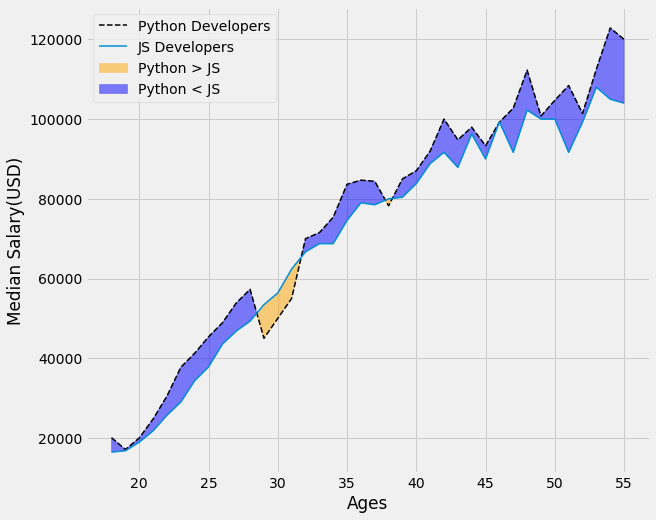

In [12]:
plt.figure(figsize=(9,8))
plt.plot(ages, data['Python'], 'k--', linewidth=1.5, label='Python Developers')
plt.plot(ages, data['JavaScript'], linewidth=1.5, label='JS Developers')
plt.xlabel('Ages')
plt.ylabel('Median Salary(USD)')
plt.fill_between(ages, data['Python'], data['JavaScript'],
                 where=(data['Python'] <= data['JavaScript']),
                 interpolate=True, color='orange',alpha=0.5, label="Python > JS")
plt.fill_between(ages, data['Python'], data['JavaScript'],
                 where=(data['Python'] > data['JavaScript']),
                 interpolate=True, color='blue',alpha=0.5, label="Python < JS")
plt.legend()
plt.show()

<hr>

## 6. Histograms

<a href = "https://chartio.com/learn/charts/histogram-complete-guide/">All about Histograms! </a>

#### What are histograms?
A histogram is a chart that plots the distribution of a numeric variable’s values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar’s height indicates the frequency of data points with a value within the corresponding bin.

#### When to use histograms?
<ol>
    <li>Histograms are good for showing general distributional features of dataset variables. You can see roughly where the peaks of the distribution are, whether the distribution is skewed or symmetric, and if there are any outliers.</li>
    <li>When a value is on a bin boundary, it will consistently be assigned to the bin on its right or its left (or into the end bins if it is on the end points). Which side is chosen depends on the visualization tool; some tools have the option to override their default preference.</li>
</ol>

#### Best practices!

<ul>
    <li>Use a zero valued baseline.</li>
    <li>Choose an appropriate number of bins.</li>
    <li>Choose interpretable bin boundaries. </li>
    <li>A histogram is meant to depict the frequency distribution of a continuous numeric variable.</li>
</ul>

Let's say we want to plot how many people belong to a certain age group from a certain survey. One could use a bar chart for this but we can have ages ranging upto 100 which would make the visual hard to understand. The advantage of using histograms here is that we can specify bins. 

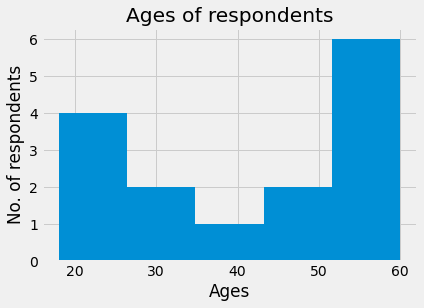

In [13]:
ages = [18, 19, 21, 25, 29, 34, 39, 45, 44, 55, 55, 56, 60, 60, 60]

plt.hist(ages, bins=5)
plt.title('Ages of respondents')
plt.xlabel('Ages')
plt.ylabel('No. of respondents')
plt.show()

Let's define the edges to make the bins stand out.

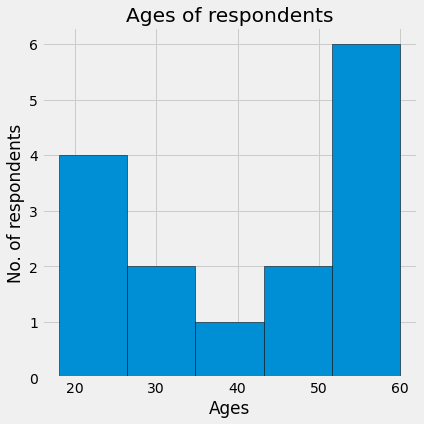

In [14]:
plt.figure(figsize=(6,6))
plt.hist(ages, bins=5, edgecolor='black')
plt.title('Ages of respondents')
plt.xlabel('Ages')
plt.ylabel('No. of respondents')
plt.show()

#### In the above plot, the bins are not clear. Let's say we want to plot the histogram where ages are broken up in groups of 10.

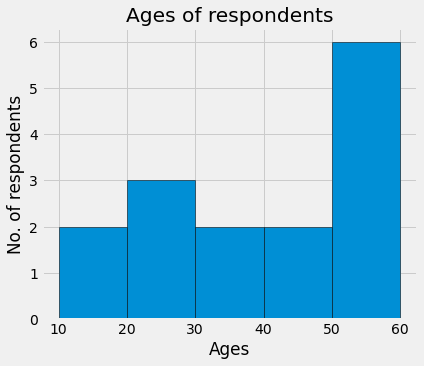

In [15]:
bins = list(range(10,70,10))
plt.figure(figsize=(6,5))
plt.hist(ages, bins=bins, edgecolor='black')
plt.title('Ages of respondents')
plt.xlabel('Ages')
plt.ylabel('No. of respondents')
plt.show()

#### The histogram now looks much more readable.

#### Let's say we wanted to exclue the age ranges 10-20. To do this we can simply start the bins from 30.

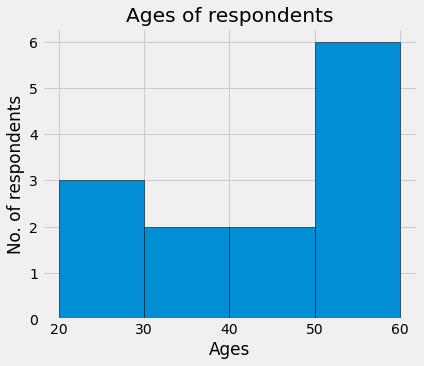

In [16]:
bins = list(range(20,61,10))
plt.figure(figsize=(6,5))
plt.hist(ages, bins=bins, edgecolor='black')
plt.title('Ages of respondents')
plt.xlabel('Ages')
plt.ylabel('No. of respondents')
plt.show()

#### Let's look at some real world data.

In [17]:
df = pd.read_csv("developer_ages.csv")

In [18]:
df.head()

,Responder_id,Age
0,1,14
1,2,19
2,3,28
3,4,22
4,5,30


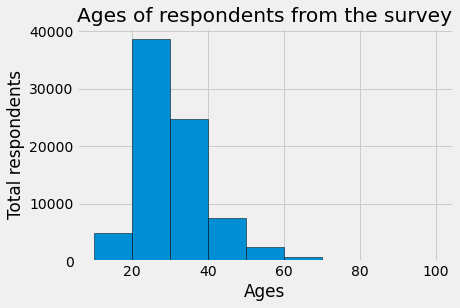

In [19]:
plt.hist(df['Age'], bins=list(range(10,101,10)), edgecolor="black")
plt.title("Ages of respondents from the survey")
plt.xlabel("Ages")
plt.ylabel("Total respondents")
plt.show()

#### We realize that from ages 60 onwards, it is very hard to see the numbers because of the large number of respondents being from the 20-40 age category. To solve this we can plot the histogram in a logarithmic scale.

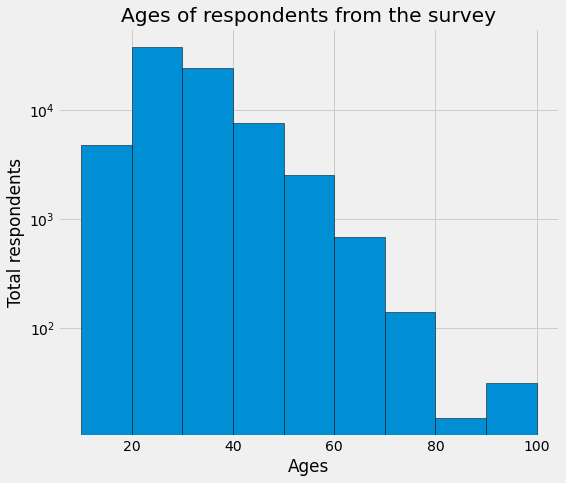

In [20]:
plt.figure(figsize=(8,7))
plt.hist(df['Age'], bins=list(range(10,101,10)), edgecolor="black", log=True)
plt.title("Ages of respondents from the survey")
plt.xlabel("Ages")
plt.ylabel("Total respondents")
plt.show()

#### Let's add a vertical line where the median age of respondents is.

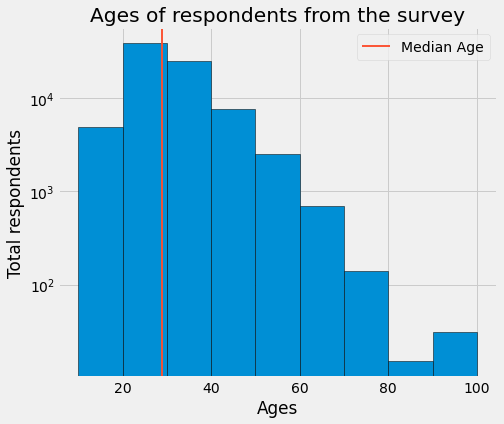

In [21]:
plt.figure(figsize=(7,6))
plt.hist(df['Age'], bins=list(range(10,101,10)), edgecolor="black", log=True)

median_age = 29
plt.axvline(median_age, color="#fc4f30", label="Median Age", linewidth=1.9)

plt.title("Ages of respondents from the survey")
plt.xlabel("Ages")
plt.ylabel("Total respondents")
plt.legend()
plt.show()